In [37]:
import torch

In [38]:
import os
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')

In [39]:
with open(data_file, 'w') as f:
    f.write('Name,Age,Sex,Balance\n')
    f.write('Alice,20,F,10000\n')
    f.write('Bob,NaN,NaN,20000\n')
    f.write('Charlie,40,NaN,30000\n')
    f.write('David,50,M,40000\n')
    

In [40]:
import pandas as pd
import numpy as np

In [41]:
data_file

'..\\data\\house_tiny.csv'

In [42]:
data = pd.read_csv(data_file)

In [43]:
data

,Name,Age,Sex,Balance
0,Alice,20.0,F,10000
1,Bob,NaN,NaN,20000
2,Charlie,40.0,NaN,30000
3,David,50.0,M,40000


In [44]:
input, output = data.iloc[:,1:3], data.iloc[:,3]
input

,Age,Sex
0,20.0,F
1,NaN,NaN
2,40.0,NaN
3,50.0,M


In [45]:
dr = input.isnull().sum()
pl = np.where(dr.max() == dr)[0]
input.drop(input.columns[pl], axis=1, inplace=True)
input

,Age
0,20.0
1,NaN
2,40.0
3,50.0


In [46]:
input.fillna(input.mean(), inplace=True)

In [47]:
X,y = torch.tensor(input.values), torch.tensor(output.values)
X

tensor([[20.0000],
        [36.6667],
        [40.0000],
        [50.0000]], dtype=torch.float64)

In [48]:
y

tensor([10000, 20000, 30000, 40000])

In [49]:
A = torch.arange(24).reshape(4,6)
A

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])

In [50]:
A / A.sum(axis=1, keepdims=True)

tensor([[0.0000, 0.0667, 0.1333, 0.2000, 0.2667, 0.3333],
        [0.1176, 0.1373, 0.1569, 0.1765, 0.1961, 0.2157],
        [0.1379, 0.1494, 0.1609, 0.1724, 0.1839, 0.1954],
        [0.1463, 0.1545, 0.1626, 0.1707, 0.1789, 0.1870]])

In [51]:
B = torch.arange(24).reshape(2,3,4)
B

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

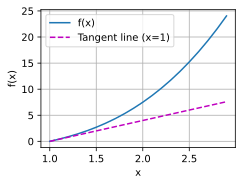

In [52]:
import tool
x = np.arange(1, 3, 0.1)
tool.plot(x, [(x ** 3) - (1 / x), 4 * x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [53]:
x = torch.arange(4.0, requires_grad=True)
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [54]:
y = 2 * x * x
y

tensor([ 0.,  2.,  8., 18.], grad_fn=<MulBackward0>)

In [55]:
y.sum().backward()

In [56]:
y

tensor([ 0.,  2.,  8., 18.], grad_fn=<MulBackward0>)

In [57]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [58]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x


In [62]:
z.sum().backward()
x.grad

tensor([0., 1., 4., 9.])

In [61]:
u

tensor([0., 1., 4., 9.])